In [1]:
library(ggplot2)
library(lsr) # statistical tool
library(psych) #A general purpose toolbox for personality
library('tidyverse') # data science tool
library(dunn.test) #Dunn's Test of Multiple Comparisons Using Rank Sums
library(BayesFactor) # hypothesis testing by bayes
library(scales) 
library(knitr) #Dynamic Report Generation in R
library(kableExtra) # tables

Warning message:
"package 'ggplot2' was built under R version 3.4.3"Warning message:
"package 'psych' was built under R version 3.4.3"
Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  1.3.4     v purrr   0.2.4
v tidyr   0.7.2     v dplyr   0.7.4
v readr   1.1.1     v stringr 1.2.0
v tibble  1.3.4     v forcats 0.2.0
Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'readr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"Warning message:
"package 'stringr' was built under R version 3.4.3"Warning message:
"package 'forcats' was built under R version 3.4.3"-

In [3]:
# anova on tyres(4 brands) and mileage

#??Apollo?????Bridgestone?????CEAT?????Falken

tyre<-read.csv("https://datascienceplus.com/wp-content/uploads/2017/08/tyre.csv")


In [4]:
str(tyre)

'data.frame':	60 obs. of  2 variables:
 $ Brands : Factor w/ 4 levels "Apollo","Bridgestone",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Mileage: num  33 36.4 32.8 37.6 36.3 ...


In [5]:
summary(tyre)

         Brands      Mileage     
 Apollo     :15   Min.   :27.88  
 Bridgestone:15   1st Qu.:32.69  
 CEAT       :15   Median :34.84  
 Falken     :15   Mean   :34.74  
                  3rd Qu.:36.77  
                  Max.   :41.05  

In [6]:
head(tyre)

Brands,Mileage
Apollo,32.998
Apollo,36.435
Apollo,32.777
Apollo,37.637
Apollo,36.304
Apollo,35.915


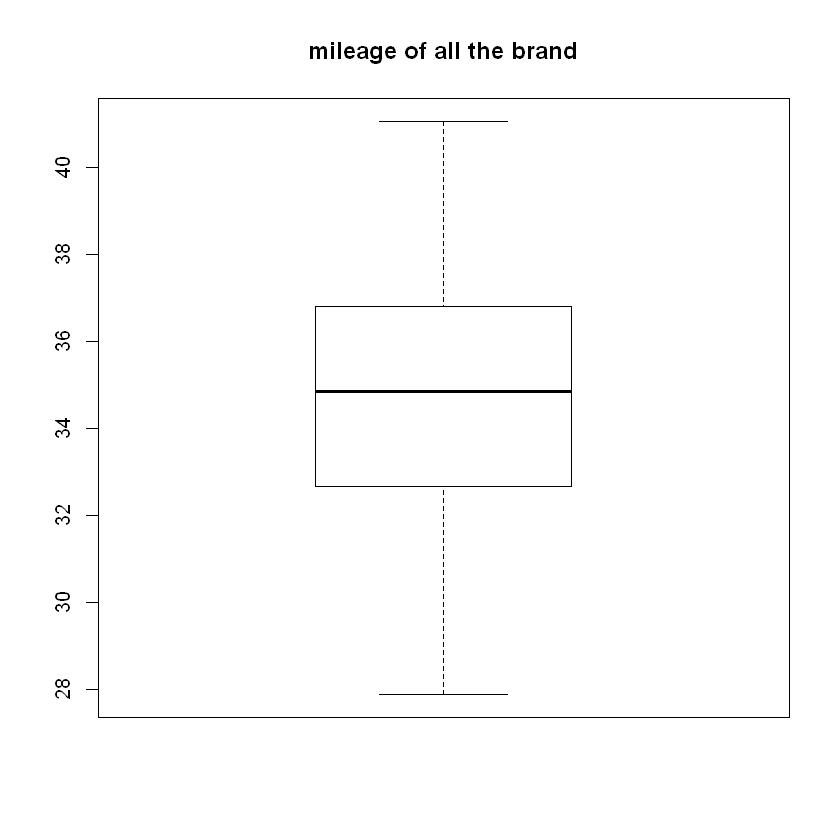

In [7]:
# boxplot()
boxplot(tyre$Mileage, main = 'mileage of all the brand')

In [8]:
describe(tyre)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Brands*,1,60,2.50000,1.127469,2.500,2.50000,1.482600,1.000,4.00,3.000,0.0000000,-1.4142111,0.1455556
Mileage,2,60,34.74129,2.977145,34.837,34.76068,3.091782,27.879,41.05,13.171,-0.1118169,-0.4360001,0.3843478


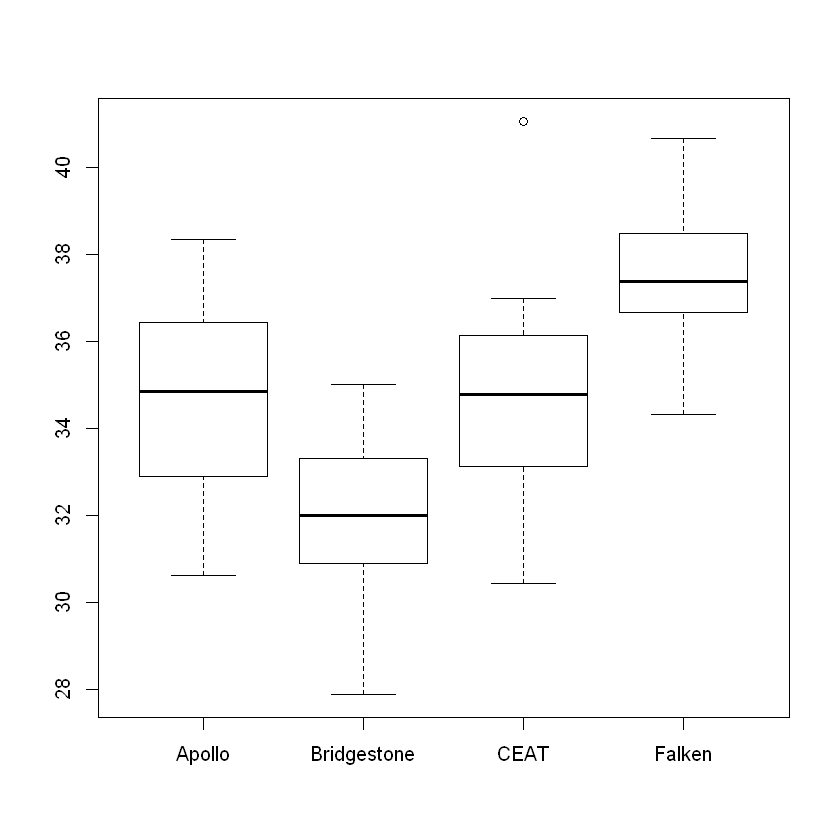

In [9]:
# brand vs mileage
boxplot(tyre$Mileage ~ tyre$Brands)

In [10]:
# analysis individual
describeBy(tyre$Mileage,group = tyre$Brands)


 Descriptive statistics by group 
group: Apollo
   vars  n mean   sd median trimmed  mad   min   max range  skew kurtosis   se
X1    1 15 34.8 2.22  34.84   34.85 2.37 30.62 38.33  7.71 -0.18    -1.24 0.57
------------------------------------------------------------ 
group: Bridgestone
   vars  n  mean  sd median trimmed  mad   min   max range  skew kurtosis   se
X1    1 15 31.78 2.2     32   31.83 1.65 27.88 35.01  7.13 -0.29    -1.05 0.57
------------------------------------------------------------ 
group: CEAT
   vars  n  mean   sd median trimmed  mad   min   max range skew kurtosis   se
X1    1 15 34.76 2.53  34.78   34.61 2.03 30.43 41.05 10.62 0.64     0.33 0.65
------------------------------------------------------------ 
group: Falken
   vars  n  mean  sd median trimmed  mad   min   max range skew kurtosis   se
X1    1 15 37.62 1.7  37.38   37.65 1.18 34.31 40.66  6.35 0.13    -0.69 0.44

In [11]:
# one way anova

tyres.aov <- aov(Mileage ~ Brands, tyre)

In [12]:
summary(tyres.aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Brands       3  256.3   85.43   17.94 2.78e-08 ***
Residuals   56  266.6    4.76                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [13]:
# takes aov cheching if all are not same
posthocPairwiseT(tyres.aov)


	Pairwise comparisons using t tests with pooled SD 

data:  Mileage and Brands 

            Apollo Bridgestone CEAT  
Bridgestone 0.0019 -           -     
CEAT        0.9622 0.0019      -     
Falken      0.0021 5.8e-09     0.0021

P value adjustment method: holm 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Mileage ~ Brands, data = tyre)

$Brands
                          diff        lwr       upr     p adj
Bridgestone-Apollo -3.01900000 -5.1288190 -0.909181 0.0020527
CEAT-Apollo        -0.03792661 -2.1477456  2.071892 0.9999608
Falken-Apollo       2.82553333  0.7157143  4.935352 0.0043198
CEAT-Bridgestone    2.98107339  0.8712544  5.090892 0.0023806
Falken-Bridgestone  5.84453333  3.7347143  7.954352 0.0000000
Falken-CEAT         2.86345994  0.7536409  4.973279 0.0037424


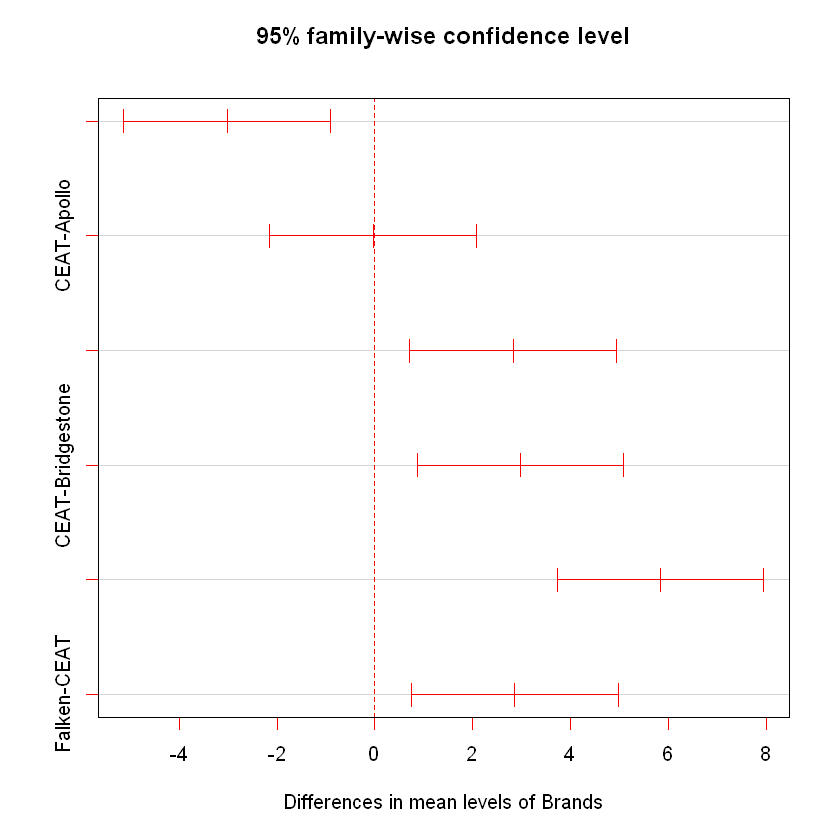

In [14]:
# Tukey's Honestly Significant Difference

TukeyHSD(tyres.aov,conf.level = 0.95)


plot(TukeyHSD(tyres.aov,conf.level = 0.95),col = 'red')


In [15]:
# eta is used ??2  is a measure of how much of the total variation in our data we can attribute to Brand and how much is just good old fashioned random variation.

ETASQUARED <- var(predict(tyres.aov))/var(tyre$Mileage)

etaSquared(tyres.aov)
# 0.49 this shows that brand matters

,eta.sq,eta.sq.part
Brands,0.4900957,0.4900957


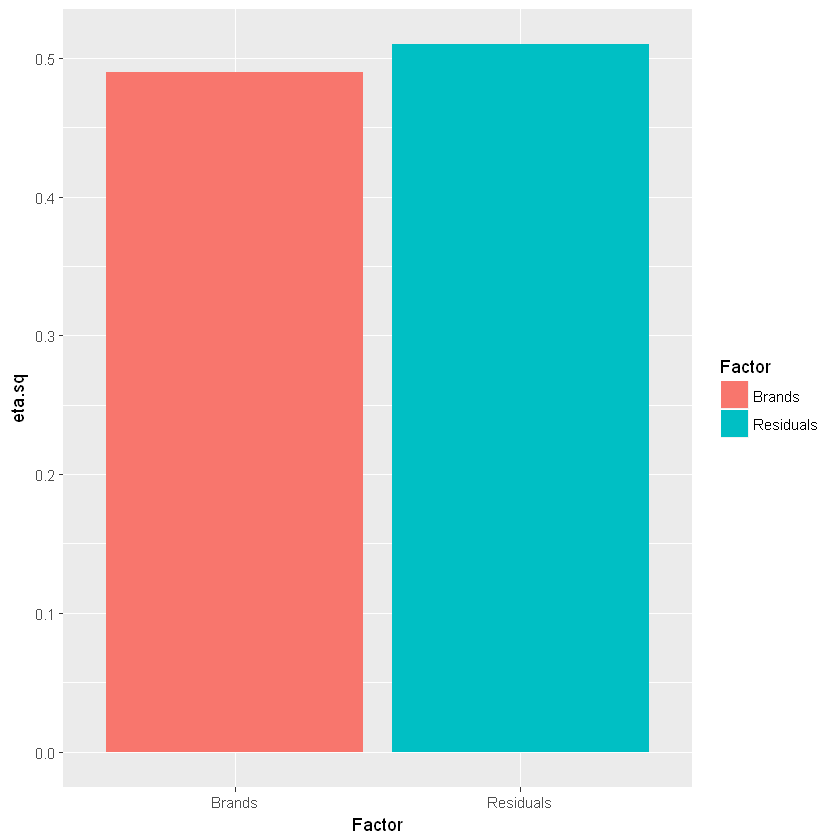

In [16]:
ddd <- as.data.frame((etaSquared(tyres.aov,anova = TRUE)))

ddd$Factor <- row.names(ddd)

# bar plot

ggplot(ddd,aes(x = Factor,y = eta.sq,fill = Factor)) + geom_col()

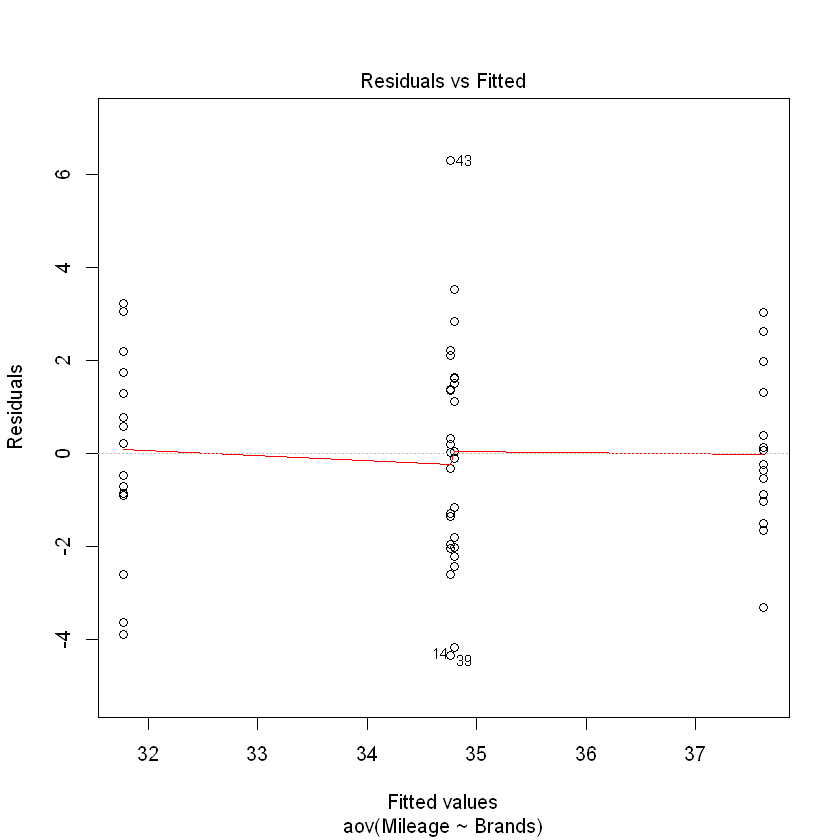

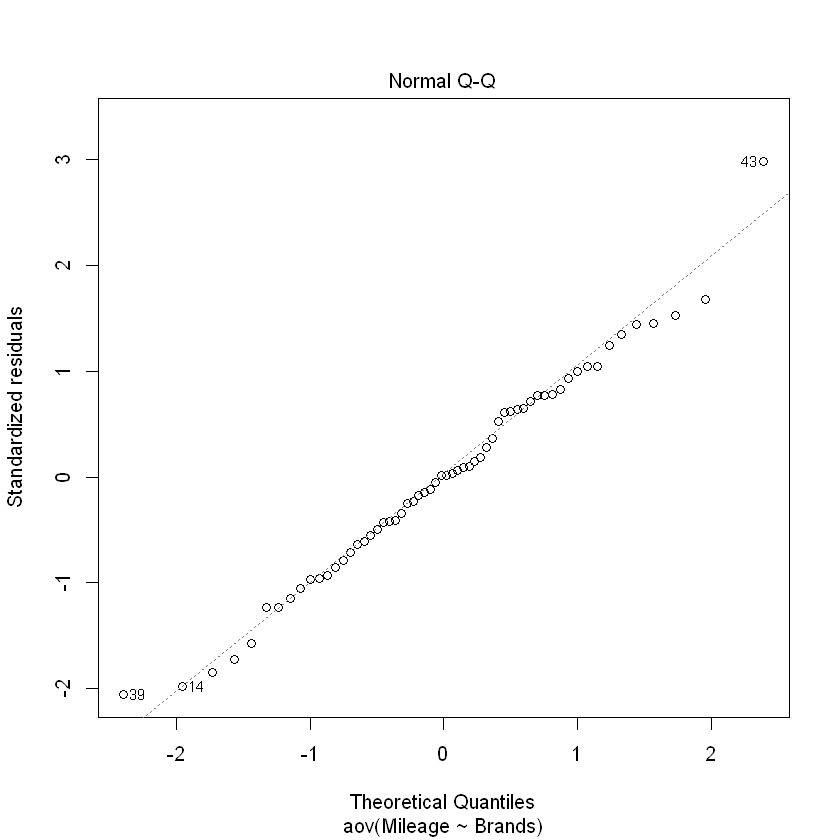

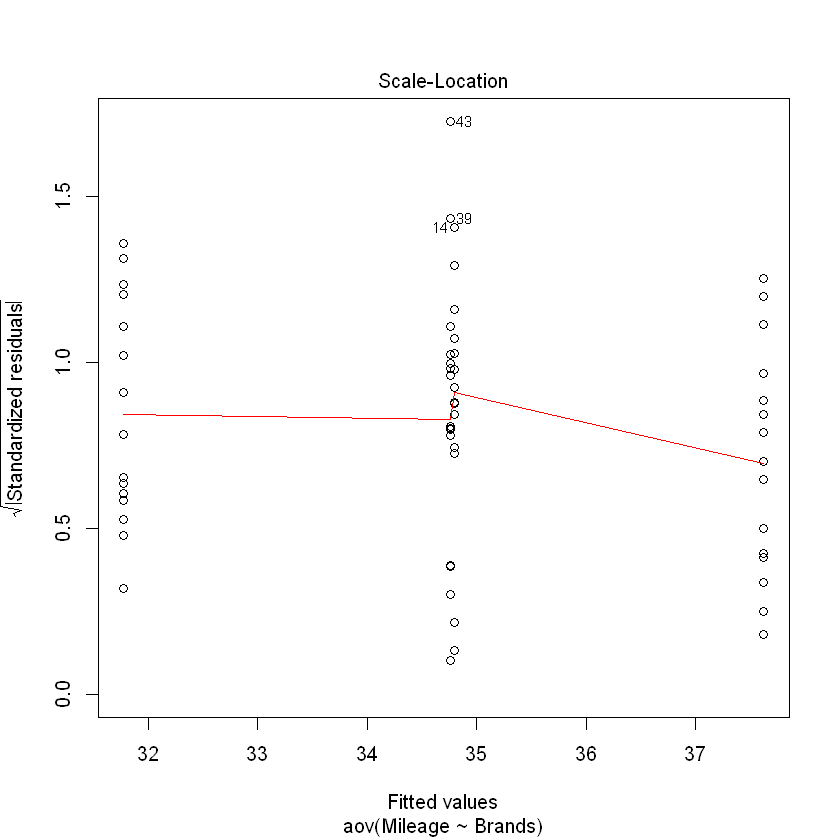

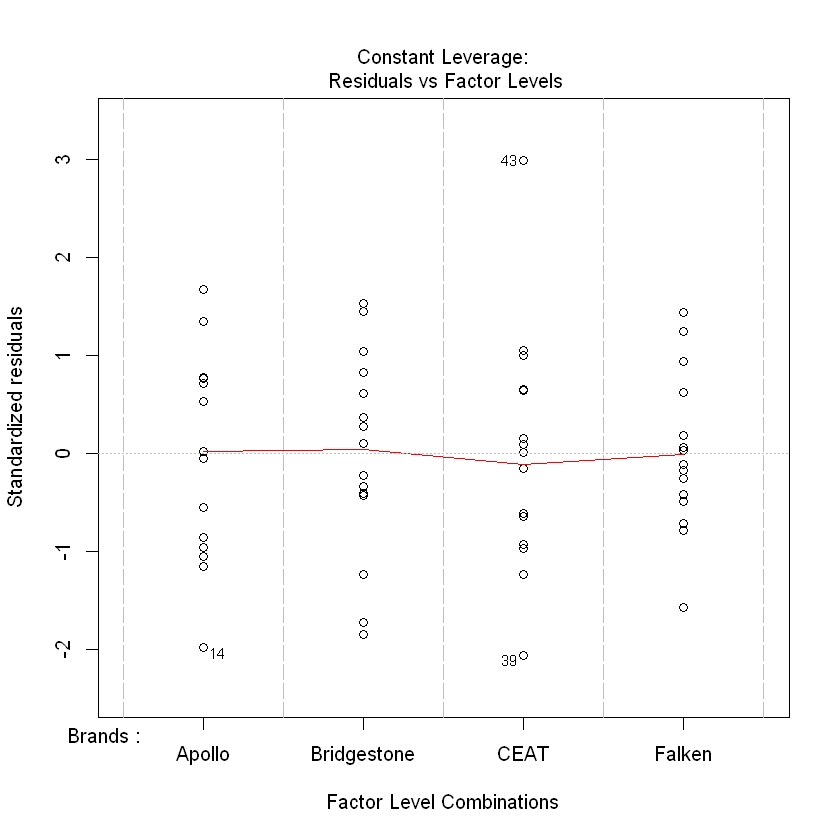

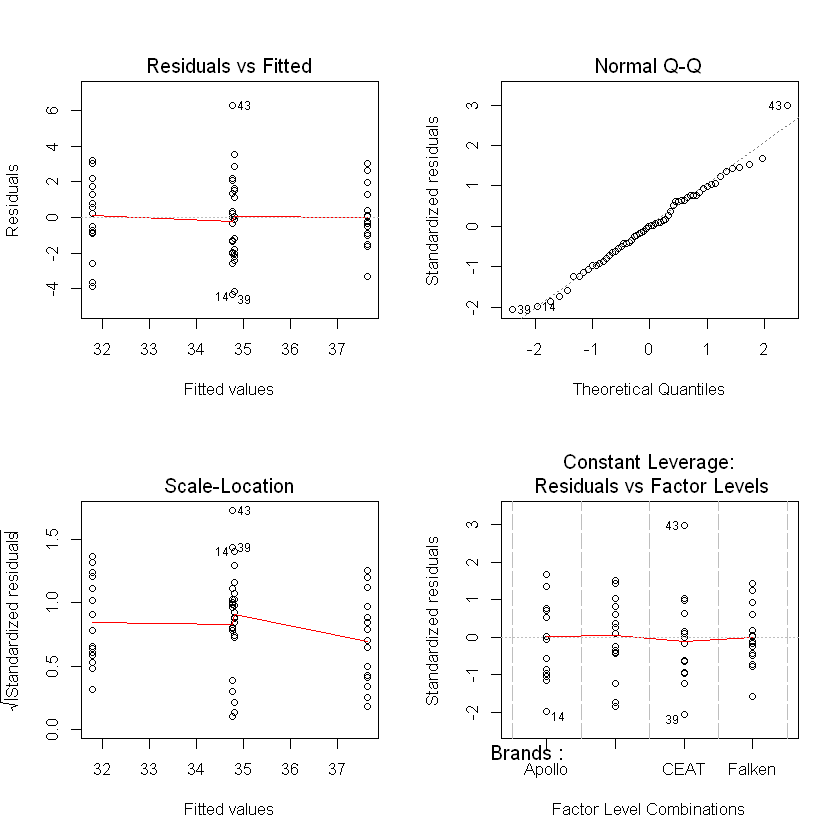

In [17]:
plot(tyres.aov)
par(mfrow = c(2,2))
plot(tyres.aov)
par(mfrow = c(1,2))

In [18]:
# bayes factor

tyres.bf.avor = anovaBF(Mileage~Brands,data = tyre)
summary(tyres.bf.avor)


Bayes factor analysis
--------------
[1] Brands : 435470.5 ±0%

Against denominator:
  Intercept only 
---
Bayes factor type: BFlinearModel, JZS

